In [14]:
from lrcb.algos.oful import oful
from lrcb.bandits.finite_linear_bandits import make_random_flb
from lrcb.visualization import notebook_utils as nu
import numpy as np
import time

## Sherman-Morrison

In [15]:
nc = 50
na = 3
dim = 10
iters = 10000
problem = make_random_flb(nc, na, dim)
seed = 0

In [21]:
reg = 1
noise = 0.1
delta = 0.2
param_bound = np.linalg.norm(problem._param)

In [22]:
start = time.time()
param = oful(problem, iters, reg, noise, delta, param_bound, 
         sherman=False, seed=seed, verbose=False, logname='oful_solve')
print(time.time() - start)

2.2233731746673584


In [23]:
start = time.time()
param = oful(problem, iters, reg, noise, delta, param_bound, 
         sherman=True, seed=seed, verbose=False, logname='oful_sm')
print(time.time() - start)

2.0333189964294434


In [24]:
start = time.time()
param = oful(problem, iters, reg, noise, delta, param_bound,
             adaptive=False,
         sherman=True, seed=seed, verbose=False, logname='oful_wc')
print(time.time() - start)

1.5820260047912598


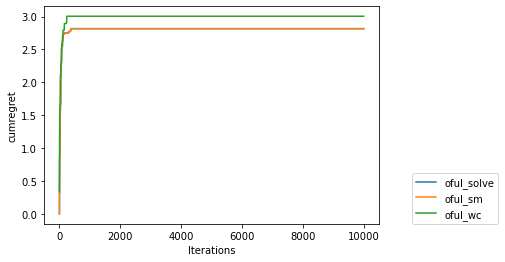

In [25]:
nu.compare('../logs', ['oful_solve', 'oful_sm', 'oful_wc'], 'cumregret', [seed])

## Smallest eigenvalue

In [8]:
d = 3000
A = np.random.normal(size=(d, d))

In [9]:
start = time.time()
_, sv, _ = np.linalg.svd(A)
mineig = sv[-1]**2
print(time.time() - start)
print(mineig)

7.569502115249634
3.993426097130166e-05


In [10]:
start = time.time()
eigv = np.linalg.eigvals(np.matmul(A, A.T))
mineig2 = np.min(eigv)
print(time.time() - start)
print(mineig2)
assert np.allclose(mineig2, mineig)

5.6931281089782715
3.993426027881901e-05
